In [1]:
###Loading packages
import pandas as pd
from upsetplot import from_contents
from upsetplot import UpSet
from matplotlib import pyplot as plt
from upsetplot import generate_counts

In [2]:
###Loading data in
df=pd.read_csv("UpsetPlot_GapFilling_Populations.csv", encoding='latin-1')
df.head()

,Norman,Guayabo,TamboDeMora,Boulkiemdé,Tunapuco,Matses
0,16444,16444.0,16444.0,16444.0,16444.0,1.0
1,4932,4932.0,4932.0,4932.0,4932.0,3.0
2,9853,9853.0,9853.0,9853.0,9853.0,4.0
3,27223,27223.0,27223.0,27223.0,27223.0,5.0
4,24127,24127.0,24127.0,24127.0,24127.0,6.0


In [3]:
###Creating a list from the file
lists_of_filename=["UpsetPlot_GapFilling_Populations.csv"]

In [4]:
###Making dictionary for titles of graphs/files
list_of_types=["Populations"]

In [5]:
###Counter for loop
counter=0

In [6]:
###Running this loop. The "encoding='latin-1'" is necessary to load in
###the csv file and column names correctly.
for file in lists_of_filename:
    df = pd.read_csv(file, encoding='latin-1')

In [7]:
###Making input lists while also dropping NAs and duplicates.
Norman=df['Norman'].dropna().drop_duplicates().tolist()
Guayabo=df['Guayabo'].dropna().drop_duplicates().tolist()
TamboDeMora=df['TamboDeMora'].dropna().drop_duplicates().tolist()
Boulkiemdé=df['Boulkiemdé'].dropna().drop_duplicates().tolist()
Tunapuco=df['Tunapuco'].dropna().drop_duplicates().tolist()
Matses=df['Matses'].dropna().drop_duplicates().tolist()

populations= from_contents({'Norman':Norman, 
                            'Guayabo': Guayabo, 
                            'TamboDeMora': TamboDeMora,
                           'Boulkiemdé': Boulkiemdé,
                           'Tunapuco': Tunapuco,
                           'Matses': Matses})

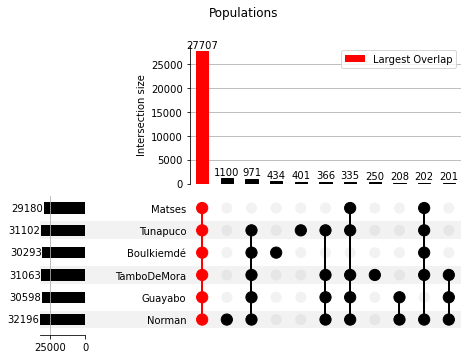

In [8]:
###Parameters for UpSet plot, then visualizing and saving it
###Features like the number of groupings and coloring can be modified
upset_plt=UpSet(populations,sort_categories_by=None, sort_by='cardinality',
               min_subset_size=200, facecolor='black', other_dots_color=0.05,
               shading_color=0.05, with_lines=True, element_size=32, show_counts=True,
               show_percentages=False)
upset_plt.style_subsets(min_subset_size=6000, label="Largest Overlap", facecolor="red")
upset_plt.plot()
plt.suptitle(list_of_types[counter])
plt.savefig(list_of_types[counter]+"_upset.jpeg",
           bbox_inches="tight")